###############################################################################################################################

 Energy Analysis by Implementing Linear Regression 
----------------------------------------------------------------------------------------

###############################################################################################################################

### By: Sara Khosravi
 ---------------------------


Instructor: MS.Giti  Saikia
------------------------------------

###############################################################################################################################

***************************************--DATA MINING COLLECT DATA AND MAKE DECISION--******************************************


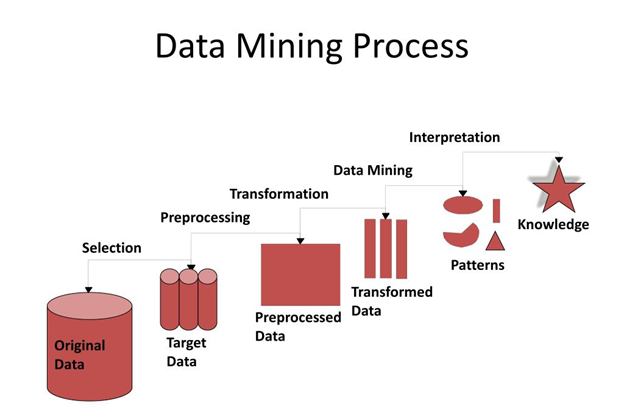

###############################################################################################################################

# Linear Regression Overview

###############################################################################################################################

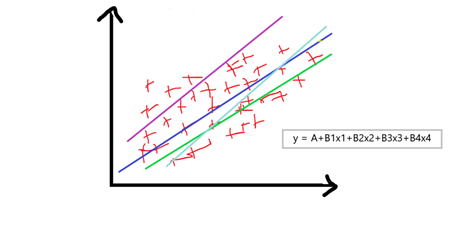

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.

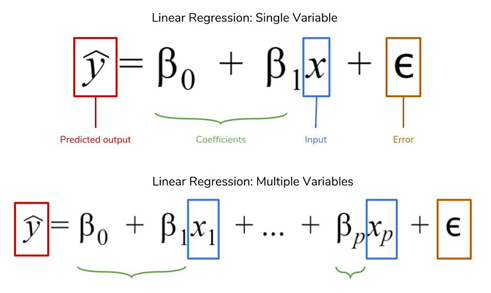

Source:
-----------

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).


Data Set Information:
-------------------------------

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


Attribute Information:
-------------------------------

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load


Relevant Papers:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012



Citation Request:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012 (the paper can be accessed from [Web Link])

For further details on the data analysis methodology:
A. Tsanas, 'Accurate telemonitoring of Parkinsonâ€™s disease symptom severity using nonlinear speech signal processing and statistical machine learning', D.Phil. thesis, University of Oxford, 2012 (which can be accessed from [Web Link])

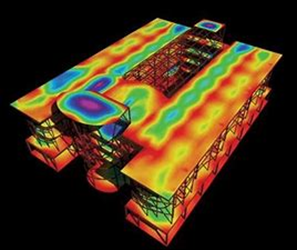



In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
#Import pandas for the data-structures
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.chdir(r'C:\Sara\Data SCIENCE\DataMining\Project_Linear Regression')
os.getcwd()


'C:\\Sara\\Data SCIENCE\\DataMining\\Project_Linear Regression'

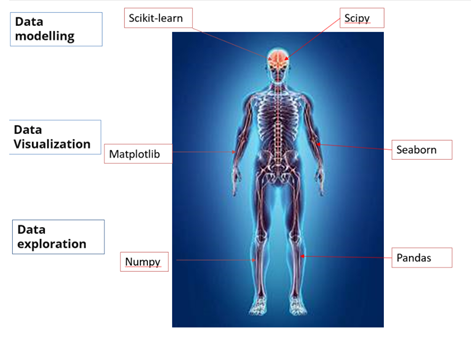

##### What are the types of data analysis in Python?

Data can be in any of the popular formats - CSV, TXT, XLS/XLSX (Excel), sas7bdat (SAS), Stata, Rdata (R) etc. Loading data in python environment is the most initial step of analyzing data. Date Type variable in consistent date format. pandas is a powerful data analysis package. It makes data exploration and manipulation easy.

## DATA COLLECTION

In [6]:
#import the dataset
data=pd.read_excel(r'C:\Sara\Data SCIENCE\DataMining\Project_Linear Regression\ENB2012_data.xlsx')
data.shape

(768, 10)

##### DataFrame - head() function

Pandas DataFrame head () Method in Python By Ankit Lathiya Last updated May 26, 2020 Pandas DataFrame head () method returns top n rows of a DataFrame or Series where n is a user input value. The head () function is used to get the first n rows. The head () function is used to get the first n rows. It is useful for quickly testing if your object has the right type of data in it. For negative values of n, the head () function returns all rows except the last n rows, equivalent to df [:-n]. The head () method in python contains only one parameter, which is n.

##### Rename Columns 

In [7]:
data.columns= ['Relative Compactness','Surface Area','Wall Area','Roof Area', 'Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load'] 

In [8]:
data.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


- Looking at the data, it is seen that the data is an structured data.
- Most of the data, are NUMERICAL and CONTINUOUS.


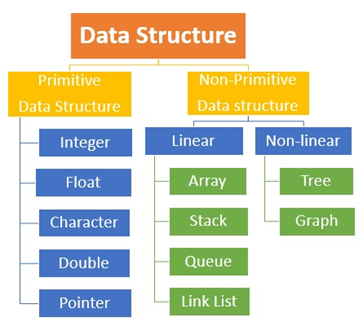

##### DataFrame - tail() function

The tail() function is used to get the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows. Syntax: DataFrame.tail(self, n=5) Parameters:

In [9]:
data.tail(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


##### iloc ()
Python iloc () function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset. With iloc () function, we can retrieve a particular value belonging to a row and column using the index values assigned to it. Python | Extracting rows using Pandas .iloc[] Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages and makes importing and analyzing data much easier. Pandas provide a unique method to retrieve rows from a Data frame.

You can use .iloc on a Series similar to using [] on a list.
You can use .loc on a Series similar to using [] on a dictionary.

##### set_option(param,value)

set_option takes two arguments and sets the value to the parameter as shown below −

display.max_rows Using set_option(), we can change the default number of rows to be displayed.

Pandas provide API to customize some aspects of its behavior, display is being mostly used.

The API is composed of five relevant functions. They are −

get_option() set_option() reset_option() describe_option() option_context() Let us now understand how the functions operate.

##### How to widen output display to see more columns in Pandas dataframe?

In Python, if there are many more number of columns in the dataframe, then not all the columns will be shown in the output display. So, let’s see how to widen output display to see more columns.

Method: Using pandas.set_option() function.

This function is used to set the value of a specified option.

In [10]:
pd.set_option('max_columns', 50)
data.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


##### dataframe.info()

This will tell us the total number of non null observations present including the total number of entries. Once number of entries isn’t equal to number of non null observations, we can begin to suspect missing values.

Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric python packages. Pandas is one of those packages and makes importing and analyzing data much easier.

Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [12]:
#making a copy of data before preprocessing
data_raw=data.copy()

##### What is pandas profile report?

Generates profile reports from a pandas DataFrame . The pandas df.describe () function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report () for quick data analysis.

The pandas_profiling library in Python include a method named as ProfileReport () which generate a basic report on the input DataFrame. A sample of DataFrame. Number of bins in histogram. The default is 10. Whether or not to check correlation. It’s True by default. Threshold to determine if the variable pair is correlated. The default is 0.9.

pandas_profiling.ProfileReport(data)

In [9]:
#pandas_profiling.ProfileReport(data)

## Data Preprocessing and Data Manipulation 


Real-world data is messy. That’s why libraries like pandas are so valuable. Using pandas you can take the pain out of data manipulation by extracting, filtering, and transforming data in DataFrames, clearing a path for quick and reliable data analysis. If you want to improve your data wrangling skills this is the track for you. You’ll learn how to prepare real-world data for analysis and grow your expertise as you work with multiple DataFrames using pandas. You’ll also gain hands-on experience of how to combine, merge, and create visualizations. At the end of the track, you'll apply your new-found data manipulation skills to analyze the impact of weather and gender on police behavior. Start this track and discover how pandas can save you time manipulating data.

data.sort_values('trip_start_date').head(5)

## DATA PREPROCESSING - HANDLING MISSING VALUE


WHAT DO WE DO TO MISSING VALUES

There are several options for handling missing values each with its own PROS and CONS. However, the choice of what should be done is largely dependent on the nature of our data and the missing values. Below is a summary highlight of several options we have for handling missing values. DROP MISSING VALUES FILL MISSING VALUES WITH TEST STATISTIC PREDICT MISSING VALUE WITH A MACHINE LEARNING ALGORITHM Below is a few list of commands to detect missing values with EDA.

Count total missing values in a dataframe
data.isnull().sum().sum()

#Gives a integer value

#Python, pandas #Count missing values for each column of the dataframe df data.isnull().sum(axis = 0)

#Python, pandas #Count missing values for each row of the dataframe df data.isnull().sum(axis = 1)

In [13]:
#Python, pandas
#Count missing values for each column of the dataframe df
#By default (axis = 0)
missingrows = data.isna().sum()

In [14]:
print(data.columns)
print(missingrows.shape)
print(data.shape)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')
(10,)
(768, 10)


In [15]:
#Percentange of missing values 
for column in data.columns:
    print('Percentage of missing values in {} is {}'.format(column,missingrows[column]/len(data)))

Percentage of missing values in Relative Compactness is 0.0
Percentage of missing values in Surface Area is 0.0
Percentage of missing values in Wall Area is 0.0
Percentage of missing values in Roof Area is 0.0
Percentage of missing values in Overall Height is 0.0
Percentage of missing values in Orientation is 0.0
Percentage of missing values in Glazing Area is 0.0
Percentage of missing values in Glazing Area Distribution is 0.0
Percentage of missing values in Heating Load is 0.0
Percentage of missing values in Cooling Load is 0.0


In [15]:
#drop columns that have 80% or more missing values
#data = data.dropna(axis=1, thresh=153)

##### Handling Duplicate Data

In real world you ara not allowd to remove any obsevation that belongs to test (future) data set, 
because we have to predict for each observation of tast data set. that's why I will just remove duplicate data from 
train data set.

In [16]:
#drop duplicate
data=data.drop_duplicates()

## DATA PREPROCESSING 

##### The statistical summary of the dataset

This is SUMMERIZING the FACT. This part does not have ESTIMATION.

In [17]:
# Getting the summary of Data
data.describe()# for numeric columns
pd.options.display.float_format = "{:.2f}".format
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.00,0.76,0.11,0.62,0.68,0.75,0.83,0.98
Surface Area,768.00,671.71,88.09,514.50,606.38,673.75,741.12,808.50
Wall Area,768.00,318.50,43.63,245.00,294.00,318.50,343.00,416.50
Roof Area,768.00,176.60,45.17,110.25,140.88,183.75,220.50,220.50
Overall Height,768.00,5.25,1.75,3.50,3.50,5.25,7.00,7.00
Orientation,768.00,3.50,1.12,2.00,2.75,3.50,4.25,5.00
Glazing Area,768.00,0.23,0.13,0.00,0.10,0.25,0.40,0.40
Glazing Area Distribution,768.00,2.81,1.55,0.00,1.75,3.00,4.00,5.00
Heating Load,768.00,22.31,10.09,6.01,12.99,18.95,31.67,43.10
Cooling Load,768.00,24.59,9.51,10.90,15.62,22.08,33.13,48.03


We need to DESCRIPTIVE DATA, this is some of fact and does NOT MAKE SENSE.

In [18]:
#finding just unique values
data.apply(lambda x: len(x.unique()))

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

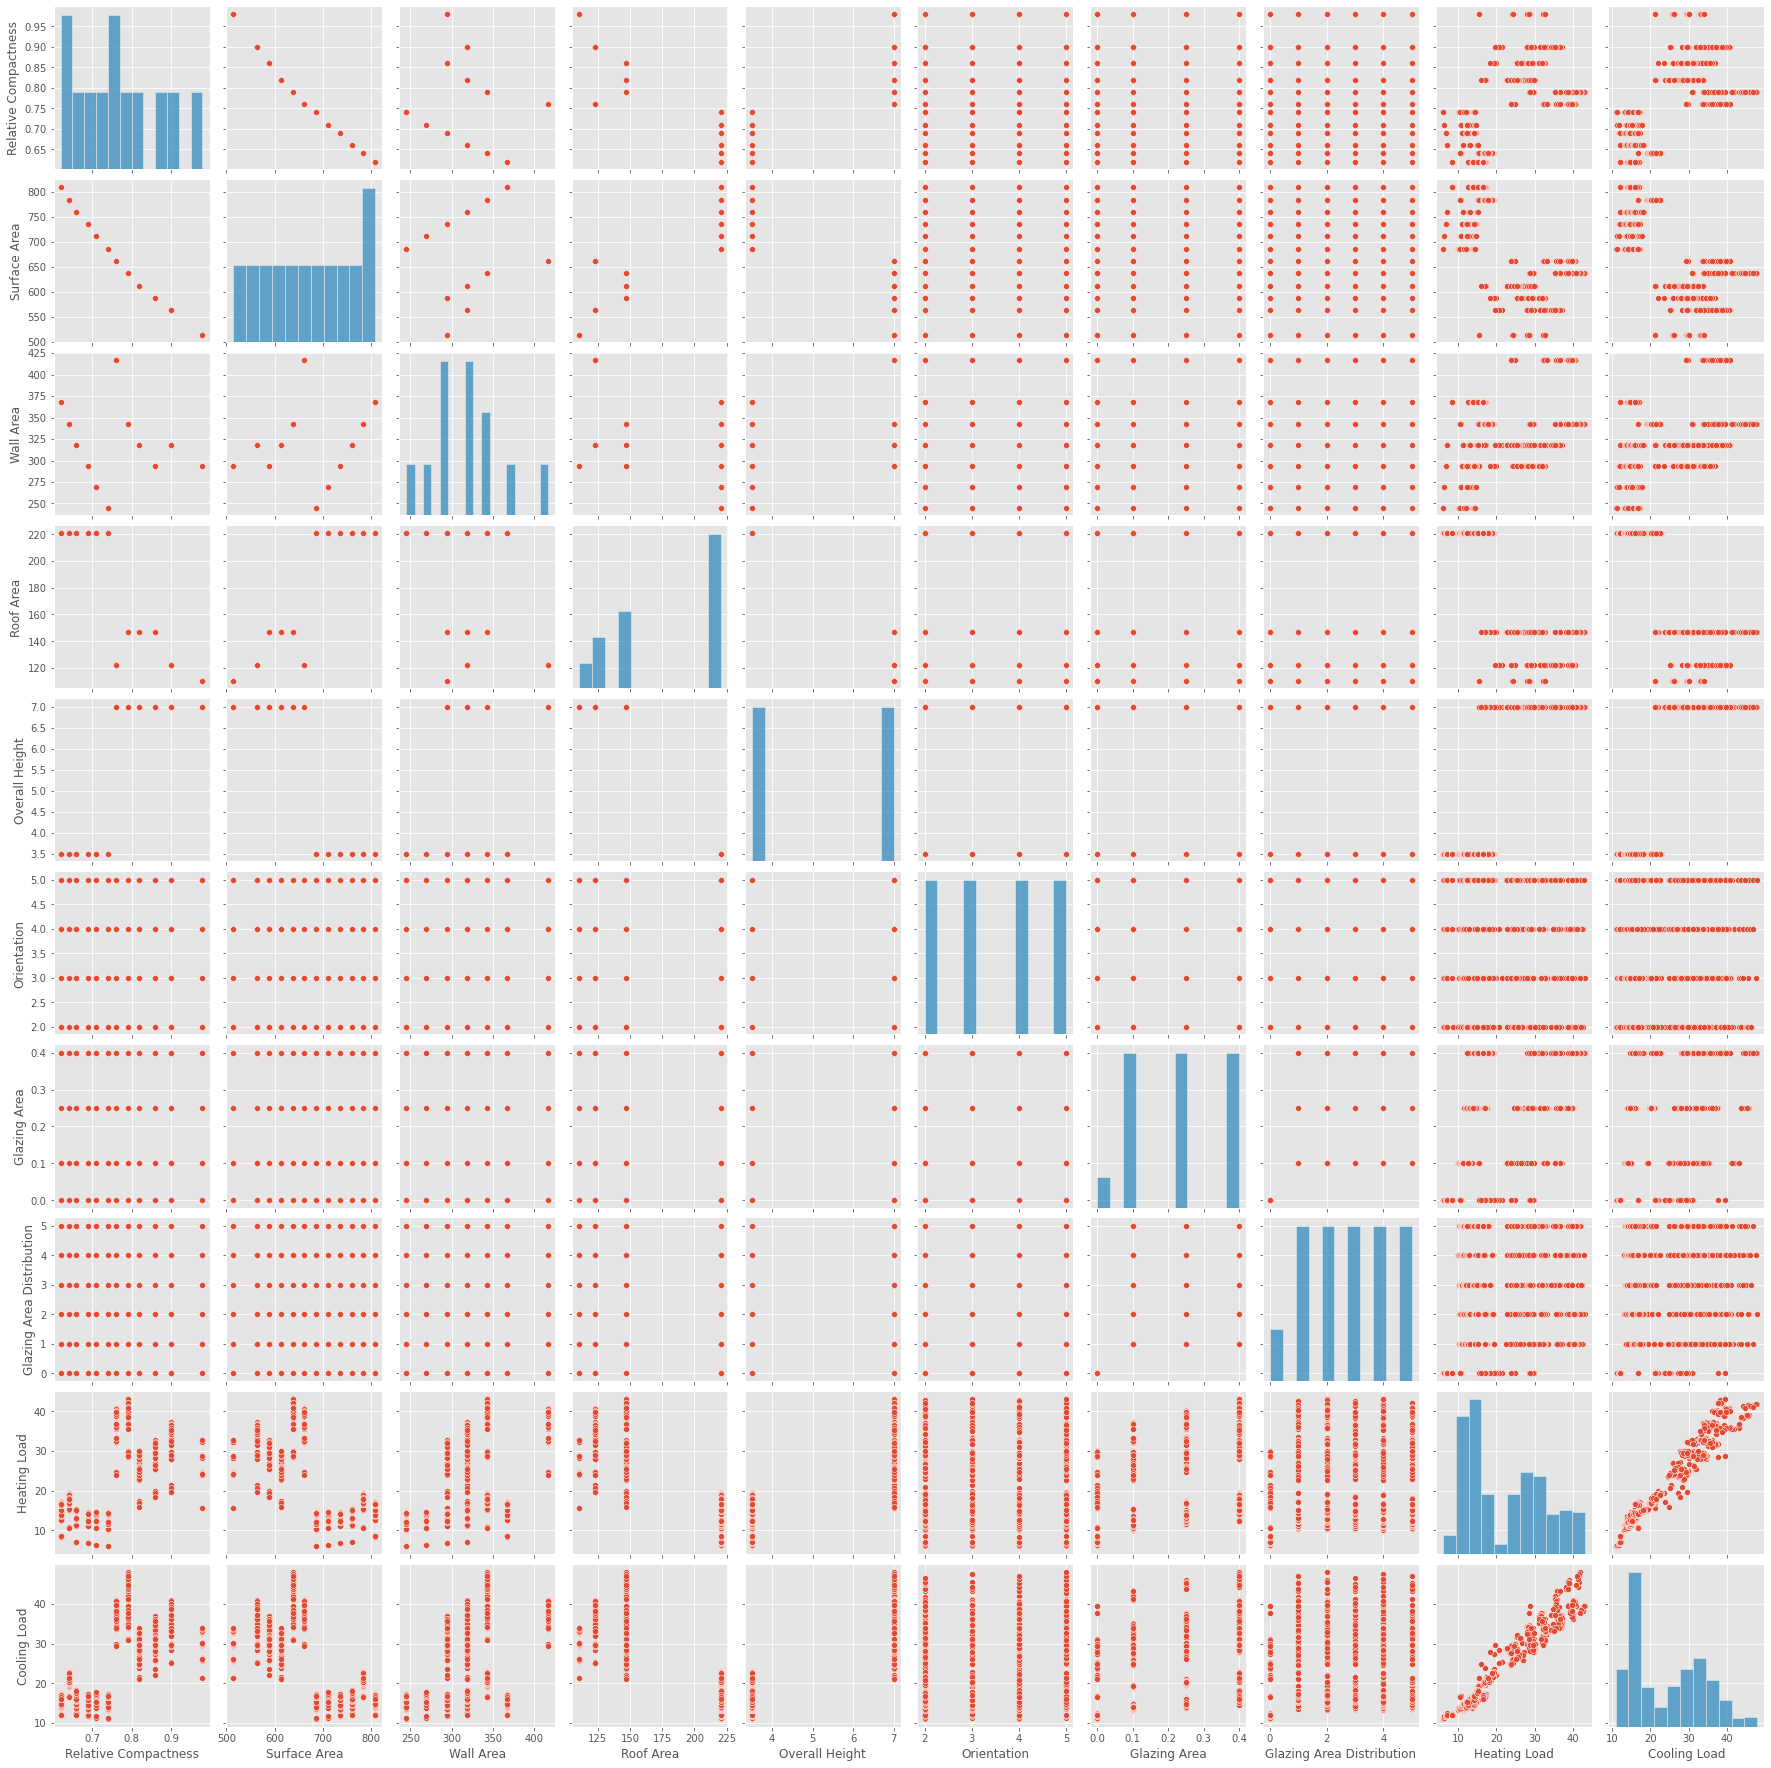

In [19]:
# Pairplot of all the numeric variables
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data, vars=['Relative Compactness','Surface Area','Wall Area','Roof Area', 'Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load'])
plt.show()

##### Using box-plot for display the outlier

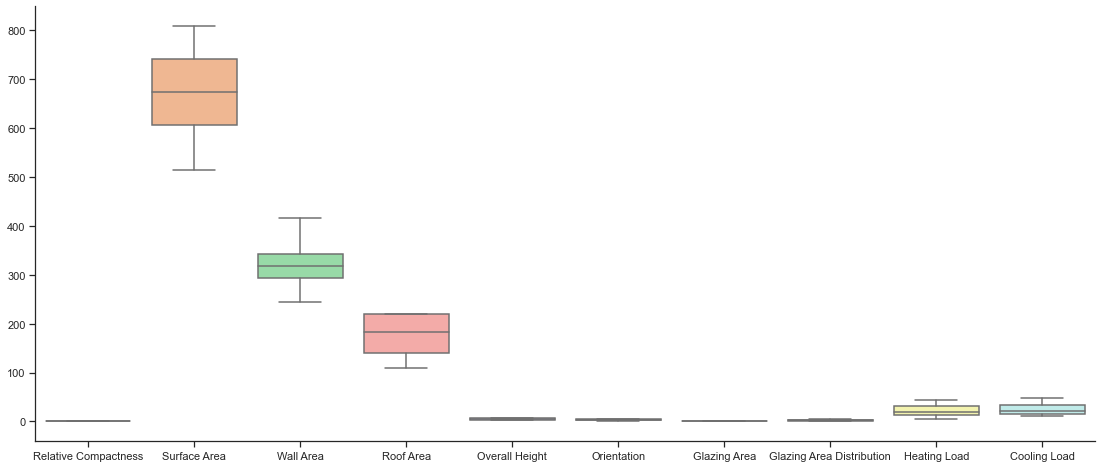

In [20]:
# Finding outliers by using BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(19,8))
sns.boxplot(data=data)
sns.despine()

we don't have major outliers in our data

There are no tiny circles in the boxplot, which means there are no outliers in our dataset.

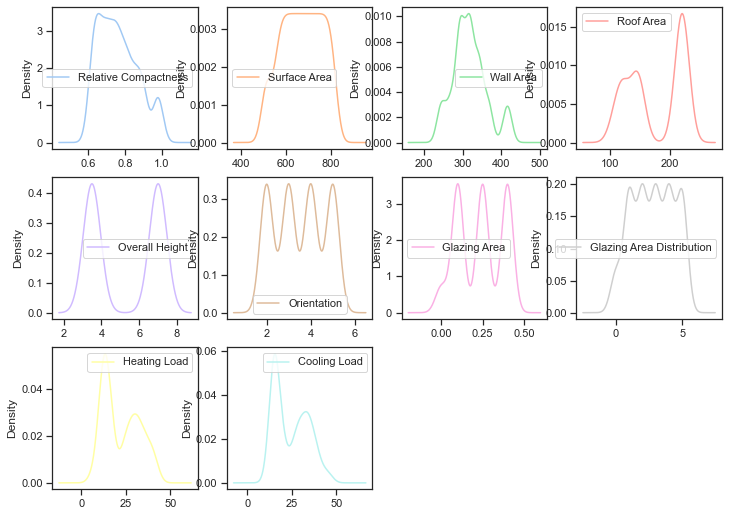

In [21]:
#densityPlot
data.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));

Majority of the features have a positive skew except for a few, 'oreintation' and 'overall_height' have quite even distribution

In [22]:
data.astype('object').describe().transpose()

,count,unique,top,freq
Relative Compactness,768.00,12.00,0.62,64.00
Surface Area,768.00,12.00,637.00,64.00
Wall Area,768.00,7.00,318.50,192.00
Roof Area,768.00,4.00,220.50,384.00
Overall Height,768.00,2.00,7.00,384.00
Orientation,768.00,4.00,5.00,192.00
Glazing Area,768.00,4.00,0.10,240.00
Glazing Area Distribution,768.00,6.00,5.00,144.00
Heating Load,768.00,587.00,15.16,6.00
Cooling Load,768.00,636.00,14.27,4.00


From this result, Cooling Load has 4 unique values and Heating Load has 6 unique values

## Exploratory Analysis - Corrolation

<AxesSubplot:>

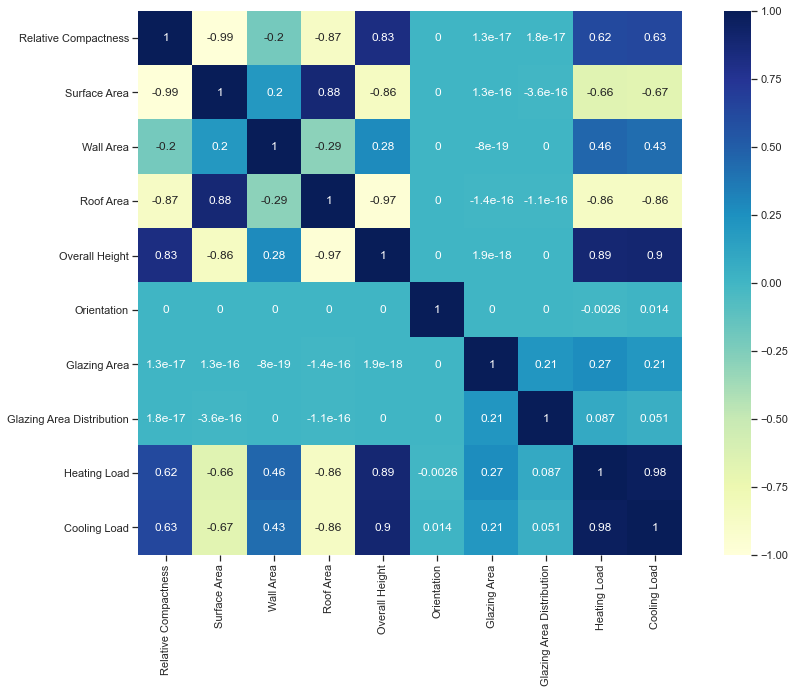

In [23]:
#Correlation Plot for finding the relation between variables
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, vmin=-1,vmax=1,cmap ="YlGnBu", annot=True,square=True)


By using heatmap, dropping the variables has the high corrolation such as 'Roof Area'  has a highly linear corrolated with 'Surface Area' and "Overall Height"  highly linear corrolated with 'Relative Compactness' and also 'Heating Load' and 'Cooling Load' have highly linear corrolated with 'Overall Height'.


data=data.drop(['Relative Compactness','Surface Area','Roof Area', 'Overall Height','Heating Load','Cooling Load'], axis=1)

##### Correlation 

Method1: using "dataframe.corr()" in Pandas

The main intention of Seaborn heatmap is to visualize the correlation matrix of data for feature selection to solve business problems.

Keep in mind, mostly heatmap correlation use for feature selection from the dataset to build a Machine Learning model.


Method2: Using "scipy.stats.pearsonr(x, y)"

## Exploratory Analysis - Frequency Distribution

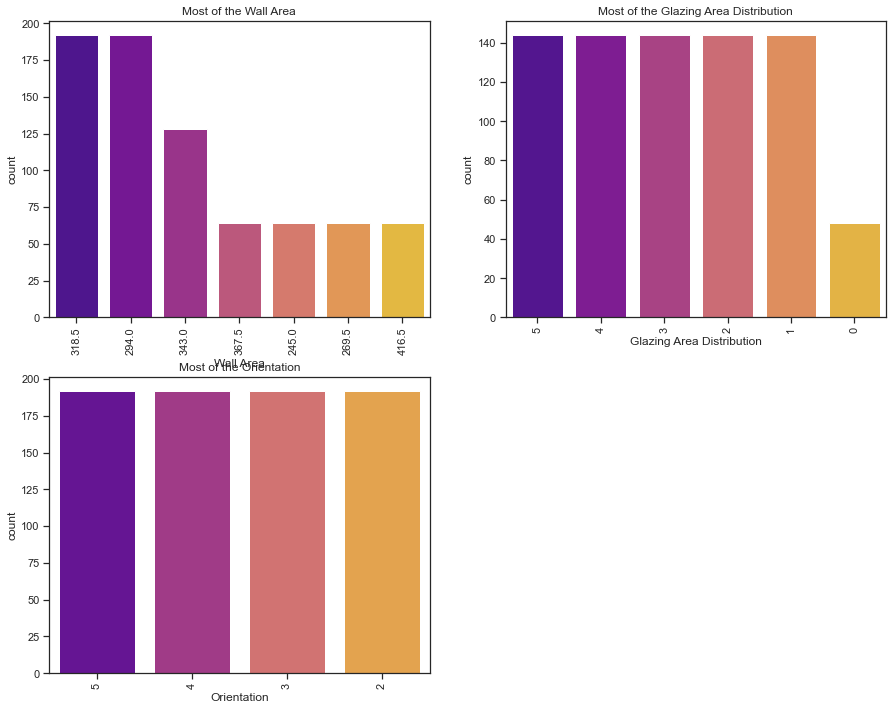

In [24]:
plt.rcParams['figure.figsize']=15,12


plt.subplot(221)
sns.countplot(data['Wall Area'],
             order=data['Wall Area'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Wall Area')


plt.subplot(222)
sns.countplot(data['Glazing Area Distribution'],
             order=data['Glazing Area Distribution'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Glazing Area Distribution')


plt.subplot(223)
sns.countplot(data['Orientation'],
             order=data['Orientation'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Orientation')

plt.show()


### DATA PREPROCESSING - SHUFFLING THE DATA

SHUFFLING the data must be, before than SPLITTING the data.That mean before test and train do shuffling the data.

In [25]:
data = data.sample(frac=1, random_state=0)

In [26]:
X = data.drop(['Heating Load','Cooling Load','Relative Compactness'], axis=1)
y = data['Cooling Load']


## DATA PREPROCESSING - Scaling 

The datasets which we use to build a model for a particular problem statement is usually built from various sources. Thus, it can be assumed that the data set contains variables/features of different scales.
In order for our machine learning or deep learning model to work well, it is very necessary for the data to have the same scale in terms of the Feature to avoid bias in the outcome.

Thus, Feature Scaling is considered an important step prior to the modeling.
Feature Scaling can be broadly classified into the below categories:

Normalization
Standardization

The STANDARDIZATION method should be used the data has OUTLIER.

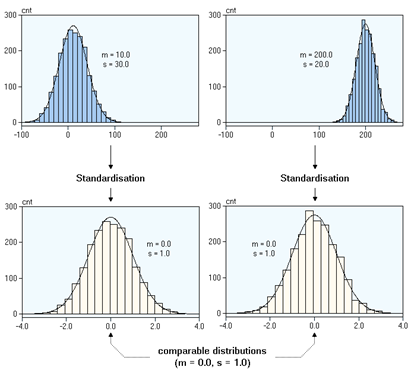

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [27]:
from sklearn.preprocessing import StandardScaler

#standardizing all the columns
sc=StandardScaler()
scaled=sc.fit_transform(X)

#converted to dataframe to work easily on columns
x_scl=pd.DataFrame(scaled, columns=X.columns)

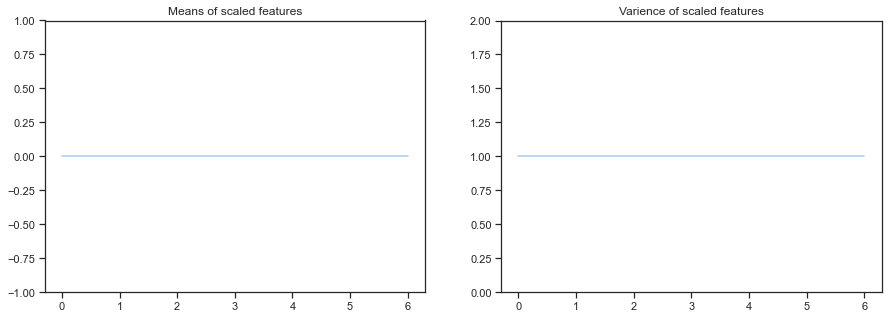

In [28]:
#check weathear data is standardized or not
plt.rcParams['figure.figsize']=15,5

plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(x_scl.shape[1]):
    means.append(np.mean(x_scl.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(x_scl.shape[1]):
    vars.append(np.var(x_scl.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

Dataset is well STANDARDISED.

## Data Handling - Predictive / Supervised Learning - Linear Regression

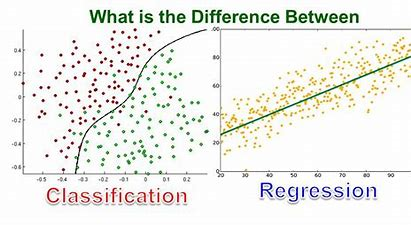

Regression Analysis – Multiple linear regression
Multiple linear regression analysis is essentially similar to the simple linear model, with the exception that multiple independent variables are used in the model. The mathematical representation of multiple linear regression is:

Y = a + bX1 + cX2 + dX3 + ϵ
 

Where:

Y – Dependent variable
X1, X2, X3 – Independent (explanatory) variables
a – Intercept
b, c, d – Slopes
ϵ – Residual (error)
 

Multiple linear regression follows the same conditions as the simple linear model. However, since there are several independent variables in multiple linear analysis, there is another mandatory condition for the model:

Non-collinearity: Independent variables should show a minimum of correlation with each other. If the independent variables are highly correlated with each other, it will be difficult to assess the true relationships between the dependent and independent variables.
 

Shuffle the data because of the cross validation score was resulting negative.

## LNEAR REGRESSION - Ordinary Least Squares ( OLS) method

OLS stands for ordinary least squares. OLS is heavily used in econometrics—a branch of economics where statistical methods are used to find the insights in economic data. As we know, the simplest linear regression algorithm assumes that the relationship between an independent variable (x) and dependent variable (y) is of the following form: y = mx + c , which is the equation of a line.

ADJ R^2 = 1 - (N/N-M-1)*(1 - R^2) = 1 - (768/768-7-1) * (1 - R^2) = 1 - 1.01 * (1 - R^2)

1.01 vs. 1 

- If the coefecient of (1-R^2) very close to 1. Therefore we can use R^2, in the MULTIPLE LINEAR regression.

In [29]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling Load   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     947.4
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        16:21:22   Log-Likelihood:                -1998.9
No. Observations:                 768   AIC:                             4012.
Df Residuals:                     761   BIC:                             4044.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### LNEAR REGRESSION - OLS - Interpretation 

* Dependent variable: Dependent variable is one that is going to depend on other variables. In this regression analysis Y is our dependent variable because we want to analyse the effect of X on Y.

* Model: The method of Ordinary Least Squares(OLS) is most widely used model due to its efficiency. This model gives best approximate of true population regression line. The principle of OLS is to minimize the square of errors ( ∑ei2 ).


1) The values of R2, in this experiment, are equal to 0.882 This means the model is a good candidate model but, there is a need to understand the significance of the variables been used in the model. Consequently adjusted R is also zero.
2) The value Adjusted R, are equal to 0.881 
3) The ideal value of R2 should be 1 and adjusted R should be a bit less than the 1. But, clearly here it seems to be a helpful exercise to build this model. 

2) The values of F-statistics is  947.4 more greater than 0, which means the model is significant. F test tells the goodness of fit of a regression. The test is similar to the t-test or other tests we do for the hypothesis. The F – statistic is calculated as below –                    

      F=\frac{R^{2} /(k-1)}{\left(1-R^{2}\right) /(n-k)}

3) The values of AIC and BIC are smaller, showing that the model is able to fit data well.

5) Model Significance:  The values of the p-test are small and closer to zero (<0.5) From this it can be inferred that there is greater evidence that there is little significant difference in the population and the sample. This value is not unusual enough to reject the null hypothesis and model is significant.

6) The intercept here is -31.7154 and also The Coefficient values (SLOPE) are positive which implies that these variables have a positive effect on the y variable. No interpretation as regards to standard deviation of data can be made from it. But, an idea about the standard deviation comes when we see how good the model it fits. If the coefficient of the determinant is 1 this means that the model was able to understand full variation/standard deviation. 

7)  Most of the coefficients have very small values. This is again consistent and is desired for good candidate model.  

  
7) Standard Error: The values of the standard errors are low and it is good for the model’s quality.

8) Kurtosis: In this model, the value is 4.897, from this value, it can be inferred that there is a good tight cluster of values and a small number of outliers in the model. . 

9) Skew is small (0.620), which is good. This signifies that values are lying closer and are not heavily concentrated in particular right or left area.

10) The value of Omnibus is too high and Prob (JB) is also high. Showing that, this model cannot be improved further.

11) The standard error values of almost all the variables are low. This is useful when R square  = 0.882.

11) Durbin Watson value should be between 1 and 2, in this model it is 2.068 which means that the data has more than average level of homoscedasticity.

12) Cond No. In this model 2.69e+16, This also means that the stability of the coefficients estimates will be affected when minor changes are made to model specifications. The Cond no values is low , This means the sensitivity of the input function with respect to the output function is average and the model does not suffer much from the problem multicollinearity. 


In [30]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling Load   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1421.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        16:21:27   Log-Likelihood:                -1999.7
No. Observations:                 768   AIC:                             4009.
Df Residuals:                     763   BIC:                             4033.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -31.1993      3.667     -8.

### LNEAR REGRESSION - OLS - INFERENTIAL  ANALYTIC

* R2 is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 88.2 % variation in Y can be explained by X. The maximum possible value of R2  can be 1, means the larger the R2  value better the regression.

* Since p-values of some variable is higher than 0.05 (significance level) we have to apply Backward Feature Elimination. If the p-values is higher than 0.05 (significance level), that means we can not reject the null hypothesise therefore this value is correlated and related with target and we can apply Backward Feature Elimination to getting the best model.

* Degrees of freedom are important for finding critical cutoff values for inferential statistical tests. Depending on the type of the analysis you run, degrees of freedom typically (but not always) relate the size of the sample. Because higher degrees of freedom generally mean larger sample sizes, a higher degree of freedom means more power to reject a false null hypothesis and find a significant result. DEGREE OF FREEDOM is 6.

* The remaining terms are not often used. Terms like Skewness and Kurtosis tells about the distribution of data. Skewness and kurtosis for the normal distribution are 0 and 3 respectively. Jarque-Bera test is used for checking whether an error has normal distribution or not.  


In [31]:
X2.head()

,const,Surface Area,Wall Area,Overall Height,Glazing Area
661,1.00,759.50,318.50,3.50,0.40
122,1.00,686.00,245.00,3.50,0.10
113,1.00,637.00,343.00,7.00,0.10
14,1.00,612.50,318.50,7.00,0.00
529,1.00,514.50,294.00,7.00,0.40


In [32]:
X=X2.drop('const',axis=1) #we dont need constant column for sklearn package
X.head()

,Surface Area,Wall Area,Overall Height,Glazing Area
661,759.50,318.50,3.50,0.40
122,686.00,245.00,3.50,0.10
113,637.00,343.00,7.00,0.10
14,612.50,318.50,7.00,0.00
529,514.50,294.00,7.00,0.40


## LNEAR REGRESSION - Splitting the dataset

We need to split our dataset into the test and train set. Generally, we follow the 20-80 policy or the 30-70 policy respectively.

Why is it necessary to perform splitting? This is because we wish to train our model according to the years and salary. We then test our model on the test set.

We check whether the predictions made by the model on the test set data matches what was given in the dataset.

If it matches, it implies that our model is accurate and is making the right predictions.

In [33]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.30)

### LNEAR REGRESSION IN  sklearn  - Fitting linear regression model into the training set

From sklearn’s linear model library, import linear regression class. Create an object for a linear regression class called regressor.

To fit the regressor into the training set, we will call the fit method – function to fit the regressor into the training set.

We need to fit X_train (training data of matrix of features) into the target values y_train. Thus the model learns the correlation and learns how to predict the dependent variables based on the independent variable.

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)
print('R2_train =', format(model.score(X_train,y_train)))
print('R2_test =', format(model.score(X_test,y_test)))

R2_train = 0.8824678023304441
R2_test = 0.8796065968559268


The VALUE of model.score(X_train,y_train) and model.score(X_test,y_test) very CLOSE together, therefore we can say we have a GOOD MODEL.

In [30]:
model.intercept_ #b0

-30.33955526230853

In [31]:
model.coef_ #b1

array([ 0.02319183,  0.01862451,  5.72966598, 14.40528363])

### LNEAR REGRESSION  - Inferences

REGRESSION LINE OF LINEAR MODEL:

Cooling Load = -30.34 + 0.023 * Surface Area + 0.186 * Wall Area + 5.729 * Overall Height + 14.4 * Glazing Area

The best fit line is the line which has the minimum error. 
The greatest effect on Cooling Load is Glazing Area changes and then Overal Height changes. Because the slope of that more than 1 (tang(45)).
   
   Arctang(14.4) = 86 deg
   
   Arctang(5.7) = 80 deg

- The negative intercept tells you where the linear model predicts revenue (y) would be when subs (x) is 0.
* Suggestion:

  Instead of modeling Y on X, model it on X - Mean(X) ... so what would the new equation?

  Y = m (X - mean(X)) + C


### LINEAR REGRESSION - EVALUATE MODEL - K Fold Cross Validation


#### K Fold Cross Validation

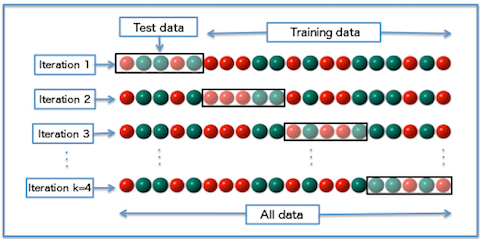

K-Fold CV gives a model with less bias compared to other methods. In K-Fold CV, we have a paprameter ‘ k ’. This parameter decides how many folds the dataset is going to be divided.
BUT using K FOLD give us much more time to run. we need to use small size in k fold. In this project k=5 therefore the TEST SIZE is 20%.

In [46]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()

0.8791986666886313

In [49]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=2).mean()

0.8805928349817564

### EVALUATE MODEL - CALCULATE Mean Absolute Error (MAE) and Root-Mean Square Error (RMSE)

MAE and RMSE are some of the most common error metrics for regression problems.

Despite being used for the same task (understanding the errors in your predictions) there are important differences between the two. Choosing the right metrics for your model can make a huge difference in your ability to solve a problem.
Among those, the confusion matrix is used to evaluate a classification problem's accuracy. On the other hand, mean squared error (MSE), and mean absolute error (MAE) are used to evaluate the regression problem's accuracy.

- MAE: It is not very sensitive to outliers in comparison to MSE since it doesn't punish huge errors. It is usually used when the performance is measured on continuous variable data. It gives a linear value, which averages the weighted individual differences equally. The lower the value, better is the model's performance.

- MSE: It is one of the most commonly used metrics, but least useful when a single bad prediction would ruin the entire model's predicting abilities, i.e when the dataset contains a lot of noise. It is most useful when the dataset contains outliers, or unexpected values (too high or too low values).

- RMSE: In RMSE, the errors are squared before they are averaged. This basically implies that RMSE assigns a higher weight to larger errors. This indicates that RMSE is much more useful when large errors are present and they drastically affect the model's performance. It avoids taking the absolute value of the error and this trait is useful in many mathematical calculations. In this metric also, lower the value, better is the performance of the model.
- RMSE is used when small errors can be safely ignored and big errors must be penalized and reduced as much as possible. RMSE gives much more importance to large errors, so models will try to minimize these as much as possible.

In [36]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import math

print('R^2=',r2_score(y_test,y_pred)) #R^2
print('MSE=',mean_squared_error(y_test,y_pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('RMSE=',math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE


R^2= 0.8796065968559268
MSE= 10.767742083604094
RMSE= 3.2814237890897444


The reslut shows us, we have a normal error.

In [35]:
SSE = np.sum((y_test-y_pred)**2)
SST = np.sum((y_test-np.mean(y_pred))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))

SSE= 2487.3484213125457
SST= 20664.200658345406
SSR= 18176.85223703286
Coefficient of Determination= 0.8796300683274672


In [132]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
Adj_R2 = 1-((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

0.8849978019278988


### LINEAR REGRESSION MODEL - Predicting the test set results

We create a vector containing all the predictions of the test set salaries. The predicted salaries are then put into the vector called y_pred.(contains prediction for all observations in the test set)

predict method makes the predictions for the test set. Hence, the input is the test set. The parameter for predict must be an array or sparse matrix, hence input is X_test.

In [43]:
import sklearn
sklearn.__version__

'0.24.1'

In [36]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([16.74990631, 31.34553757, 16.97348993, 17.88619849, 20.04699103,
       11.62740448, 21.0714914 , 11.21137648, 15.30937795, 17.9979903 ,
       38.62872448, 36.69162302, 28.76860956, 14.81269739, 15.72540595,
       16.86169812, 14.81269739, 32.36993047, 28.61643774, 32.37003794,
       21.0714914 , 32.36993047, 28.61643774, 18.91069886, 15.72540595,
       13.67640521, 30.3210372 , 32.36993047, 13.67640521, 17.9979903 ,
       34.3071394 , 32.37003794, 36.46793194, 15.94898956, 12.23587685,
       13.67640521, 28.88050884, 33.50633011, 32.36993047, 31.34553757,
       14.70090558, 34.53072301, 15.83719776, 14.81269739, 32.37003794,
       15.94898956, 32.48182974, 11.62740448, 19.02249067, 20.04699103,
       30.20913793, 34.53072301, 28.61643774, 27.17590937, 34.3071394 ,
       15.83719776, 20.04699103, 17.9979903 , 38.62872448, 36.69162302,
       33.50633011, 19.02249067, 34.3071394 , 31.34553757, 12.65190484,
       11.62740448, 18.91069886, 17.9979903 , 17.9979903 , 38.62

In [37]:
#check the mean squared error between the predicted and true values on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test,y_pred)) # mae = mean(|y_pred - y_test|)
print(mean_squared_error(y_test,y_pred)) # mse = mean[(y_pred - y_test)^2]

2.3661969747817313
10.767742083604094


This result of error in test data shows us, the accuracy of model is acceptable.

In [38]:
X_test.head()

,Surface Area,Wall Area,Overall Height,Glazing Area
190,808.50,367.50,3.50,0.10
156,612.50,318.50,7.00,0.10
703,710.50,269.50,3.50,0.40
521,784.00,343.00,3.50,0.25
714,784.00,343.00,3.50,0.40


In [39]:
y_test.head()

190   14.14
156   28.68
703   17.74
521   20.01
714   22.25
Name: Cooling Load, dtype: float64

In [40]:
y_pred[:5]

array([16.74990631, 31.34553757, 16.97348993, 17.88619849, 20.04699103])

In [41]:
y_test

190   14.14
156   28.68
703   17.74
521   20.01
714   22.25
       ... 
535   40.99
287   14.15
58    27.03
546   38.35
315   15.50
Name: Cooling Load, Length: 231, dtype: float64

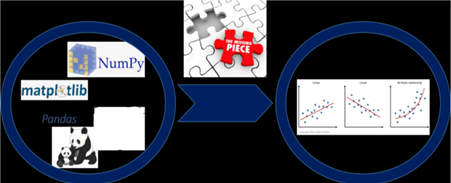

## Conclusion

Linear regression is often used in Machine Learning. In this project we can perform multiple linear regression in Python by  using both sklearn and statsmodels.

- This MULTI LINEAR REGRESSION MODEL is Good with 88% accuracy.

- To achieve a better model, it is necessary to apply other models for this issue, such as D-tree, ForestTree and so on.